# Nguyễn Minh Mẫn - 520H0098

**Câu 1**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd #
from pandas import read_csv
#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('boston_housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [3]:
# Dimension of the dataset
print(np.shape(data))

(506, 14)


In [4]:
# Let's summarize the data to see the distribution of data
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

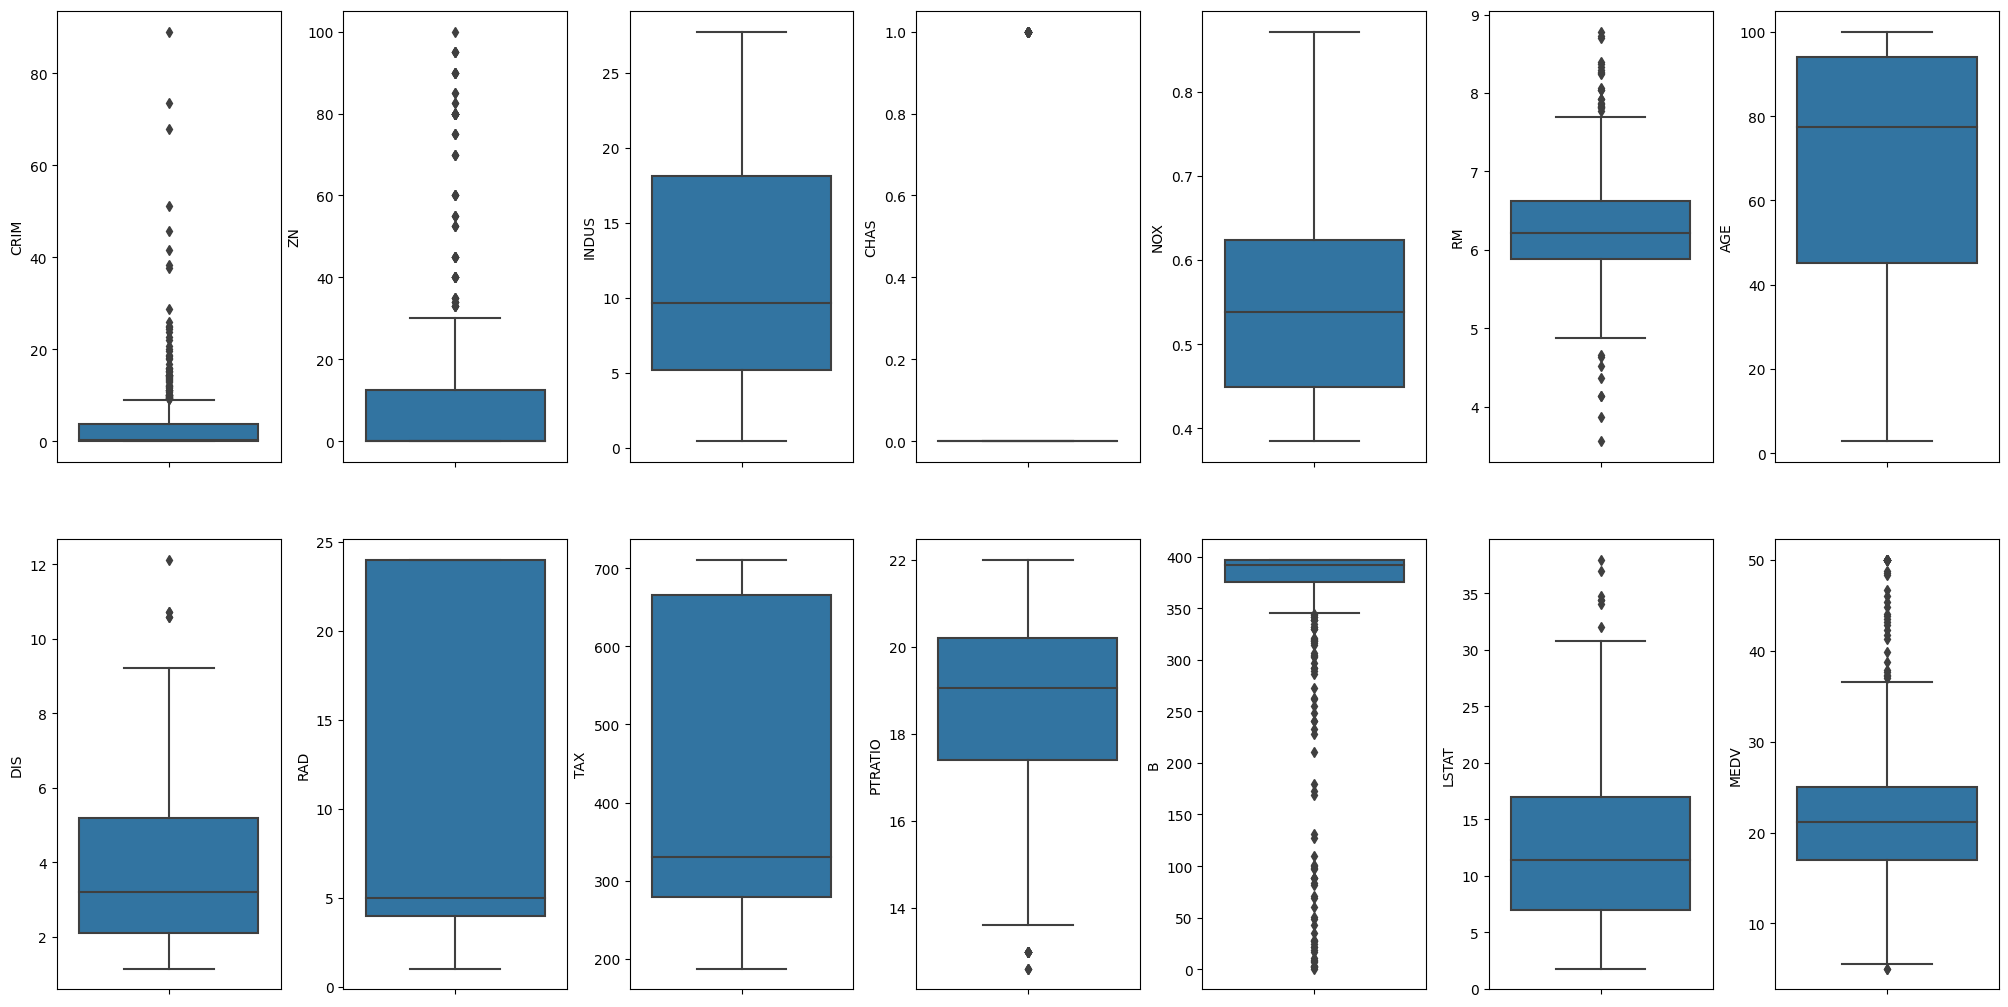

In [5]:
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

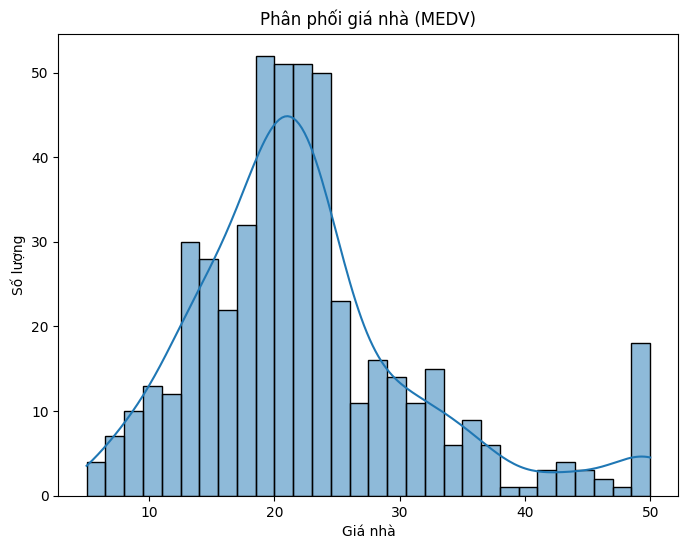

In [6]:
# Biểu đồ phân phối của giá nhà (biến mục tiêu)
plt.figure(figsize=(8, 6))
sns.histplot(data['MEDV'], kde=True, bins=30)
plt.title('Phân phối giá nhà (MEDV)')
plt.xlabel('Giá nhà')
plt.ylabel('Số lượng')
plt.show()

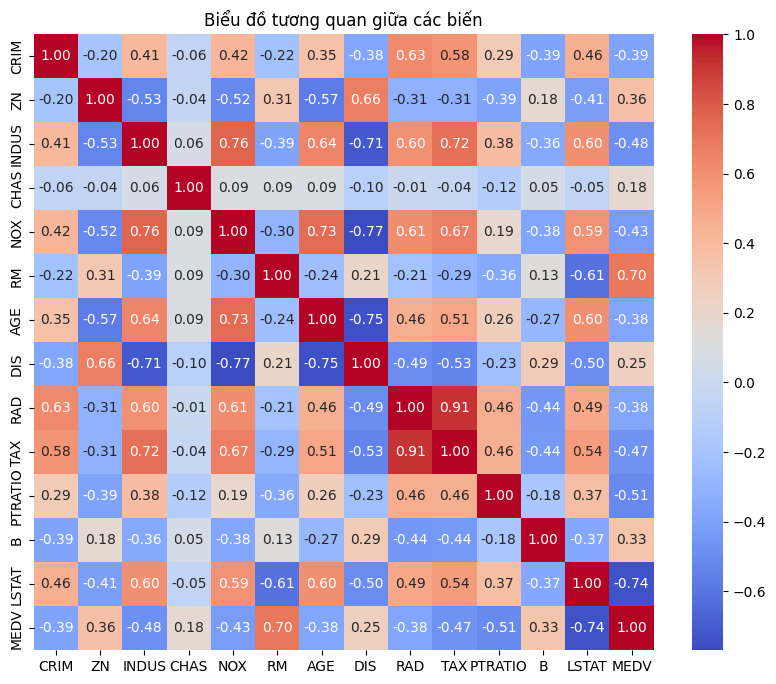

In [7]:
#ìm hiểu mối tương quan
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Biểu đồ tương quan giữa các biến')
plt.show()

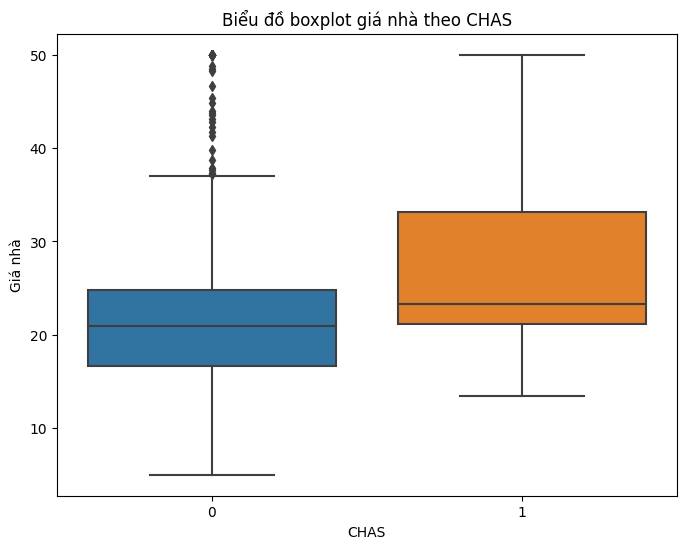

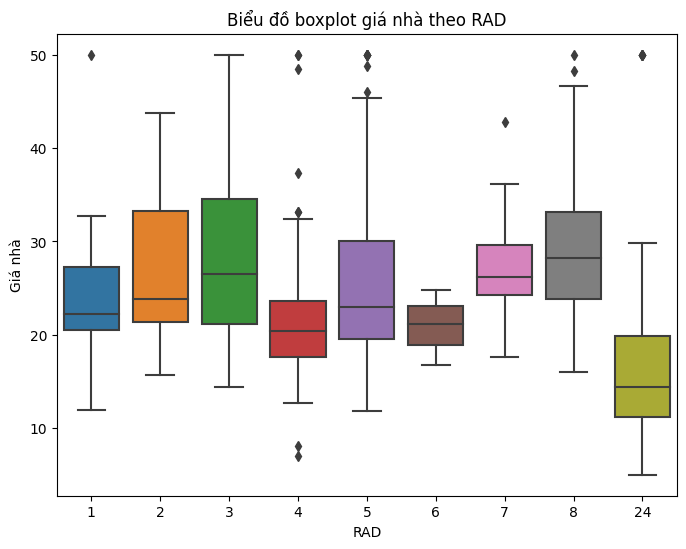

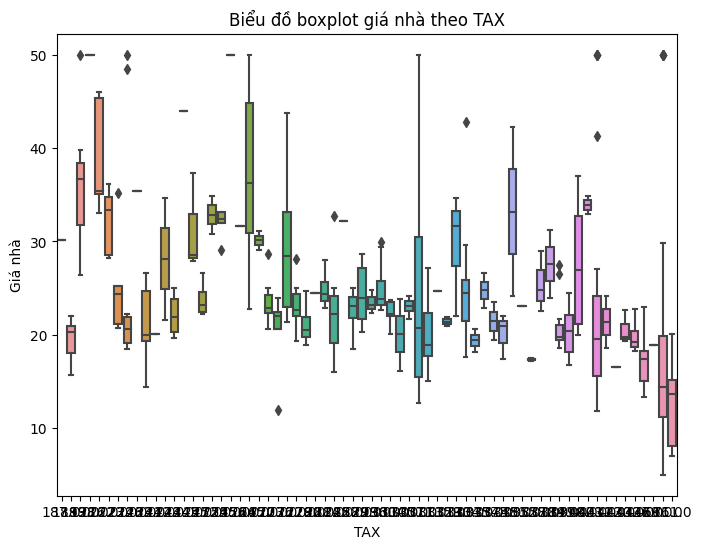

In [8]:
#Phân tích phân phối giá nhà theo các biến phân loại
categorical_columns = ['CHAS', 'RAD', 'TAX']
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, y='MEDV', data=data)
    plt.title(f'Biểu đồ boxplot giá nhà theo {col}')
    plt.xlabel(col)
    plt.ylabel('Giá nhà')
    plt.show()

**Câu 2**

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Tách biến mục tiêu (y) và các biến đặc trưng (X)
X = data.drop(columns=['MEDV'])  # Loại bỏ cột 'MEDV' để lấy các biến đặc trưng
y = data['MEDV']  # Lấy cột 'MEDV' làm biến mục tiêu

# Chia thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# In kích thước của X và y
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [10]:
lr = LinearRegression().fit(X_train, y_train)

print(f"Training: {lr.score(X_train, y_train)}")
print(f"Test: {lr.score(X_test, y_test)}")

print("it is overfitting")

Training: 0.748087259862344
Test: 0.6844267283527083
it is overfitting


In [11]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.7).fit(X_train, y_train)
print(f"Ridge Training: {ridge.score(X_train, y_train)}")
print(f"Ridge Test: {ridge.score(X_test, y_test)}")

Ridge Training: 0.7467904792416711
Ridge Test: 0.6803168470441052


In [12]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01).fit(X_train, y_train)
print("Lasso Training: {:.2f}".format(lasso.score(X_train, y_train)))
print("Lasso Test: {:.2f}".format(lasso.score(X_test, y_test)))

Lasso Training: 0.75
Lasso Test: 0.68


In [13]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.01).fit(X_train, y_train)
print(f"Elastic Net-Training: {elastic_net.score(X_train, y_train)}")
print(f"Elastic Net-Test: {elastic_net.score(X_test, y_test)}")

Elastic Net-Training: 0.7425450573217924
Elastic Net-Test: 0.67366554531525


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Khởi tạo mô hình Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Đào tạo mô hình trên tập huấn luyện
rf_model.fit(X_train, y_train)

# Dự đoán giá nhà trên tập kiểm tra
y_pred = rf_model.predict(X_test)

# Đánh giá hiệu suất sử dụng MSE và R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")

Mean Squared Error (MSE): 10.374371921259836
R-squared (R^2): 0.8518521336172665


In [15]:
from sklearn.ensemble import GradientBoostingRegressor

# Khởi tạo mô hình Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Đào tạo mô hình trên tập huấn luyện
gb_model.fit(X_train, y_train)

# Dự đoán giá nhà trên tập kiểm tra
y_pred_gb = gb_model.predict(X_test)

# Đánh giá hiệu suất sử dụng MSE và R-squared
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting:")
print(f"Mean Squared Error (MSE): {mse_gb}")
print(f"R-squared (R^2): {r2_gb}")

Gradient Boosting:
Mean Squared Error (MSE): 8.956140984840566
R-squared (R^2): 0.8721047222908935


In [16]:
from sklearn.ensemble import AdaBoostRegressor

# Khởi tạo mô hình AdaBoost
adaboost_model = AdaBoostRegressor(n_estimators=100, random_state=42)

# Đào tạo mô hình trên tập huấn luyện
adaboost_model.fit(X_train, y_train)

# Dự đoán giá nhà trên tập kiểm tra
y_pred_adaboost = adaboost_model.predict(X_test)

# Đánh giá hiệu suất sử dụng MSE và R-squared
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
r2_adaboost = r2_score(y_test, y_pred_adaboost)

print("AdaBoost:")
print(f"Mean Squared Error (MSE): {mse_adaboost}")
print(f"R-squared (R^2): {r2_adaboost}")

AdaBoost:
Mean Squared Error (MSE): 16.23542103315574
R-squared (R^2): 0.7681553154115868


**Câu 3**

In [17]:
#Feedforward Neural Network (FFNN):
# Data preprocessing
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Model building
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

In [19]:
import tensorflow as tf
# Compile the model with the appropriate loss function
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.RMSprop(), metrics=['mse'])
# Training
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
12/12 [==============================] - 1s 36ms/step - loss: 580.2144 - mse: 580.2144 - val_loss: 539.3982 - val_mse: 539.3982
Epoch 2/100
12/12 [==============================] - 0s 13ms/step - loss: 527.7996 - mse: 527.7996 - val_loss: 486.5911 - val_mse: 486.5911
Epoch 3/100
12/12 [==============================] - 0s 25ms/step - loss: 472.6521 - mse: 472.6521 - val_loss: 428.5381 - val_mse: 428.5381
Epoch 4/100
12/12 [==============================] - 0s 17ms/step - loss: 411.5003 - mse: 411.5003 - val_loss: 363.9527 - val_mse: 363.9527
Epoch 5/100
12/12 [==============================] - 0s 21ms/step - loss: 350.7238 - mse: 350.7238 - val_loss: 296.6609 - val_mse: 296.6609
Epoch 6/100
12/12 [==============================] - 0s 17ms/step - loss: 285.4065 - mse: 285.4065 - val_loss: 230.9458 - val_mse: 230.9458
Epoch 7/100
12/12 [==============================] - 0s 18ms/step - loss: 224.6794 - mse: 224.6794 - val_loss: 172.0087 - val_mse: 172.0087
Epoch 8/100
12/12 [=

In [20]:
# Fit the model to data
from tensorflow.compat.v1.keras.layers import Input
# Assuming x_train and y_train are your original training data
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
13/13 [==============================] - 0s 17ms/step - loss: 14.0287 - mse: 14.0287 - val_loss: 12.1764 - val_mse: 12.1764
Epoch 2/50
13/13 [==============================] - 0s 9ms/step - loss: 12.1728 - mse: 12.1728 - val_loss: 12.4005 - val_mse: 12.4005
Epoch 3/50
13/13 [==============================] - 0s 8ms/step - loss: 14.1013 - mse: 14.1013 - val_loss: 11.7953 - val_mse: 11.7953
Epoch 4/50
13/13 [==============================] - 0s 7ms/step - loss: 11.8895 - mse: 11.8895 - val_loss: 11.9494 - val_mse: 11.9494
Epoch 5/50
13/13 [==============================] - 0s 8ms/step - loss: 13.0378 - mse: 13.0378 - val_loss: 12.1200 - val_mse: 12.1200
Epoch 6/50
13/13 [==============================] - 0s 7ms/step - loss: 12.2591 - mse: 12.2591 - val_loss: 11.7718 - val_mse: 11.7718
Epoch 7/50
13/13 [==============================] - 0s 7ms/step - loss: 12.4883 - mse: 12.4883 - val_loss: 11.9967 - val_mse: 11.9967
Epoch 8/50
13/13 [==============================] - 0s 7ms/st

In [21]:
# Evaluation
lossF = model.evaluate(X_test, y_test)
print(f"Test Loss: {lossF}")

4/4 [==============================] - 0s 4ms/step - loss: 11.3209 - mse: 11.3209
Test Loss: [11.32092571258545, 11.32092571258545]


In [22]:
# Convolutional Neural Network (CNN) (for demonstration purposes):
# Reshaping the data to a pseudo-image format
X_train_cnn = X_train.reshape(-1, X_train.shape[1], 1)
X_test_cnn = X_test.reshape(-1, X_test.shape[1], 1)

In [23]:
# Model building for CNN
model_cnn = Sequential([
    tf.keras.layers.Conv1D(32, 2, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])

In [24]:
model_cnn.compile(optimizer='adam', loss='mean_squared_error')

# Training
model_cnn.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
12/12 [==============================] - 1s 20ms/step - loss: 576.2442 - val_loss: 519.2749
Epoch 2/50
12/12 [==============================] - 0s 4ms/step - loss: 487.0363 - val_loss: 411.6021
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 371.1495 - val_loss: 280.6305
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 246.2276 - val_loss: 159.4813
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 152.9679 - val_loss: 90.0901
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 116.1493 - val_loss: 73.2961
Epoch 7/50
12/12 [==============================] - 0s 7ms/step - loss: 107.3443 - val_loss: 68.3554
Epoch 8/50
12/12 [==============================] - 0s 5ms/step - loss: 96.0309 - val_loss: 64.8162
Epoch 9/50
12/12 [==============================] - 0s 7ms/step - loss: 86.6441 - val_loss: 63.3348
Epoch 10/50
12/12 [==============================] - 0s 8ms/step - loss: 79.5084 - val_l

In [25]:
# Evaluation
loss_cnn = model_cnn.evaluate(X_test_cnn, y_test)
print(f"Test Loss CNN: {loss_cnn}")

4/4 [==============================] - 0s 4ms/step - loss: 22.5676
Test Loss CNN: 22.567564010620117


In [26]:
# Recurrent Neural Network (RNN)
# Reshaping data for RNN (LSTM)
X_train_rnn = X_train.reshape(-1, 1, X_train.shape[1])
X_test_rnn = X_test.reshape(-1, 1, X_test.shape[1])

In [27]:
# Model building for RNN (LSTM)
model_rnn = Sequential([
    tf.keras.layers.LSTM(32, input_shape=(1, X_train.shape[1]), activation='relu'),
    Dense(1)
])

In [28]:
model_rnn.compile(optimizer='adam', loss='mean_squared_error')
# Training
model_rnn.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
12/12 [==============================] - 2s 26ms/step - loss: 600.6804 - val_loss: 589.4341
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 595.4139 - val_loss: 583.8130
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 589.5391 - val_loss: 577.3044
Epoch 4/50
12/12 [==============================] - 0s 6ms/step - loss: 582.5351 - val_loss: 569.3823
Epoch 5/50
12/12 [==============================] - 0s 6ms/step - loss: 573.9126 - val_loss: 559.8193
Epoch 6/50
12/12 [==============================] - 0s 6ms/step - loss: 563.2901 - val_loss: 548.0518
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 550.7043 - val_loss: 533.8552
Epoch 8/50
12/12 [==============================] - 0s 6ms/step - loss: 535.3579 - val_loss: 517.6542
Epoch 9/50
12/12 [==============================] - 0s 5ms/step - loss: 517.8235 - val_loss: 499.0749
Epoch 10/50
12/12 [==============================] - 0s 6ms/step - loss: 498.3011

In [29]:
# Evaluation
loss_rnn = model_rnn.evaluate(X_test_rnn, y_test)
print(f"Test Loss RNN: {loss_rnn}")

4/4 [==============================] - 0s 3ms/step - loss: 38.4250
Test Loss RNN: 38.424957275390625


In [30]:
from sklearn.model_selection import KFold

# Define the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
loss_rnn = []

In [31]:
X_test = np.array(X_test)
y_test = np.array(y_test)

# Perform cross-validation
for train_index, val_index in kf.split(X_test):
    X_val_fold = X_test[val_index]
    y_val_fold = y_test[val_index]

    # Evaluate the model on the current fold
    fold_loss = model.evaluate(X_val_fold, y_val_fold)
    loss_rnn.append(fold_loss)

1/1 [==============================] - 0s 37ms/step - loss: 6.7843 - mse: 6.7843


# Nguyễn Thị Thuận Phối - 520H0122

**Câu 4**

In [32]:
import time
import numpy as np
import pandas as pd
from joblib import dump, load
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC # SVM for classification

In [33]:
# Selecting relevant features and target
features = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
target = data[['MEDV']]

In [34]:
# Encoding categorical variables and normalizing numerical features
categorical_features = []
numerical_features =['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

preprocessor = ColumnTransformer(
    transformers=[
        # ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ],
)

In [35]:
# Defining models
models = {
    'Linear Regression': LinearRegression(fit_intercept=True, n_jobs=-1, positive=False),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, criterion='squared_error',max_depth = None, n_jobs = -1, random_state = 42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(loss = 'squared_error',learning_rate =  0.1, alpha = 0.9, n_estimators=100,ccp_alpha = 0.0, random_state=42),
    'Ridge': Ridge(alpha = 1.0,fit_intercept = True,solver = 'auto', random_state=42)
}

In [36]:
# K-Fold cross-validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [37]:
# Storing runtime for each fold of each model
fold_runtimes = []
# Storing fold results
fold_results = []
model_pipelines = {}
# Performing k-fold cross-validation for each model
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

    for fold, (train_index, test_index) in enumerate(kf.split(features)):
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]

        start_time = time.time()
        pipeline.fit(X_train, y_train.values.ravel())
        runtime = time.time() - start_time
        fold_runtimes.append({'Model': name, 'Fold': fold+1, 'Runtime': runtime})
        y_pred = pipeline.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        fold_results.append({'Model': name, 'Fold': fold+1, 'MSE': mse})
        model_pipelines[name] = pipeline

        # Save the pipeline
        dump(pipeline, f'{name}_pipeline.joblib')

In [38]:
# Convert results to DataFrame for easier plotting
results_df = pd.DataFrame(fold_results)

# Convert runtimes to DataFrame for easier plotting
runtime_df = pd.DataFrame(fold_runtimes)

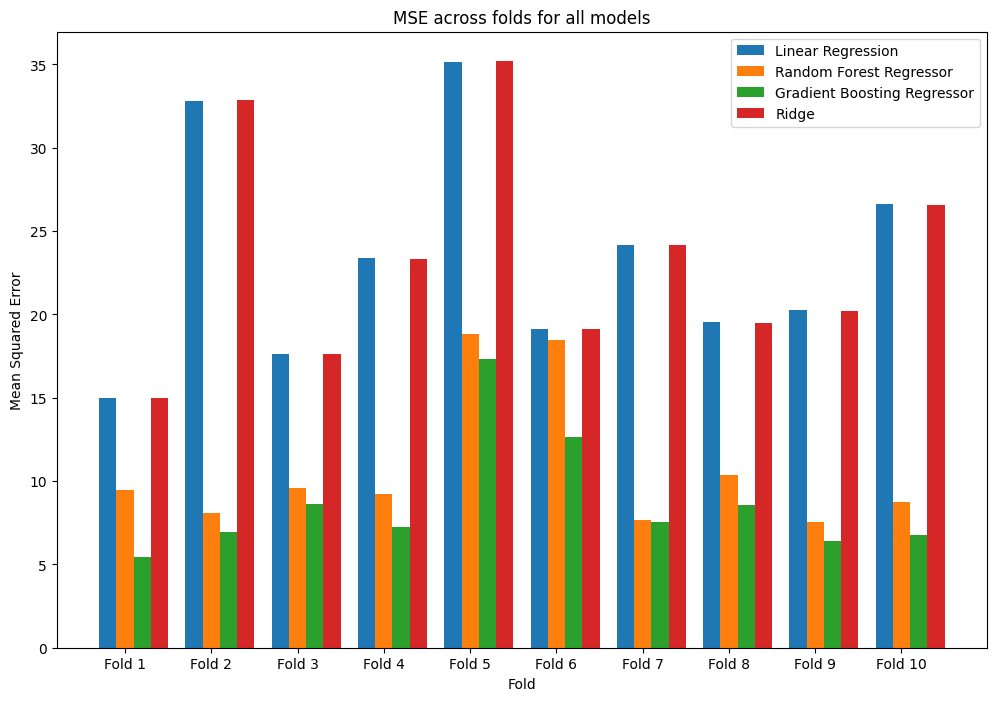

In [39]:
# Plotting MSE
plt.figure(figsize=(12, 8))
for i, model in enumerate(models.keys()):
    plt.bar(np.arange(1, 11) + i*0.2, results_df[results_df['Model'] == model]['MSE'], width=0.2, label=model)

plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.title('MSE across folds for all models')
plt.xticks(np.arange(1, 11) + 0.2, ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5','Fold 6', 'Fold 7', 'Fold 8', 'Fold 9', 'Fold 10'])
plt.legend()
plt.show()

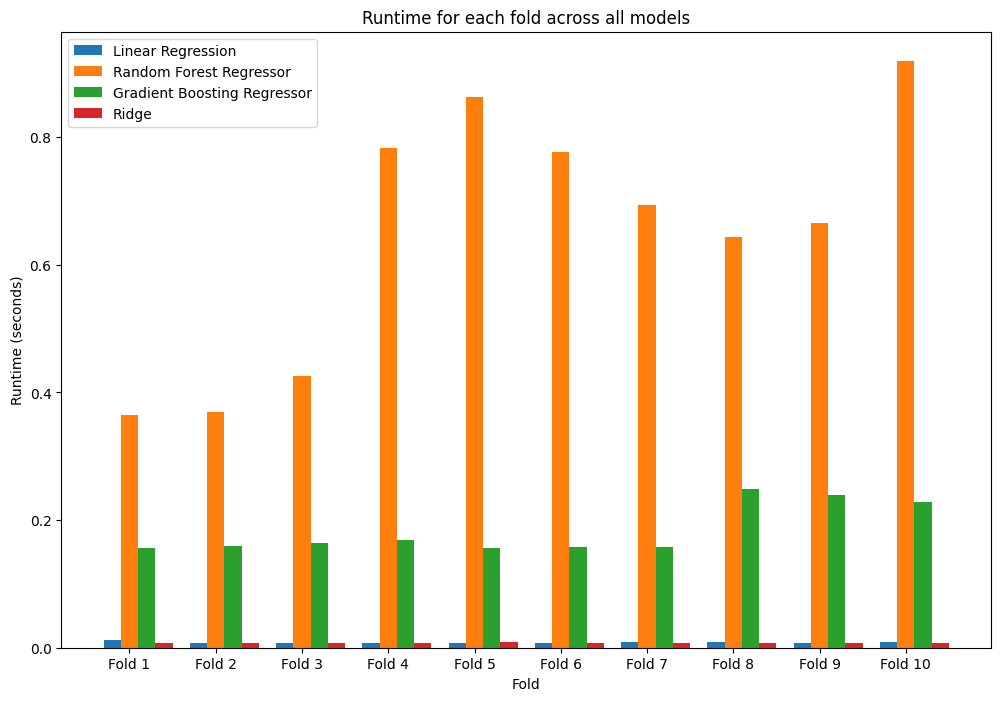

In [40]:
# Plotting runtime
plt.figure(figsize=(12, 8))
for i, model in enumerate(models.keys()):
    plt.bar(np.arange(1, 11) + i*0.2, runtime_df[runtime_df['Model'] == model]['Runtime'], width=0.2, label=model)

plt.xlabel('Fold')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime for each fold across all models')
plt.xticks(np.arange(1, 11) + 0.2, ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5','Fold 6', 'Fold 7', 'Fold 8', 'Fold 9', 'Fold 10'])
plt.legend()
plt.show()

# Nguyễn Quốc Dũng - 520H0039

**Câu 5**

Để cải thiện độ chính xác của mô hình học máy sau khi đã huấn luyện, ta có thể thực hiện các phương pháp sau:


*   Hiểu rõ về bias và variance: Đây là hai khái niệm quan trọng trong học máy. Bias mô tả khả năng học của mô hình, còn variance mô tả mức độ tổng quát hóa của mô hình. Việc hiểu rõ về hai khái niệm này sẽ giúp bạn tìm ra cách cải thiện mô hình một cách hiệu quả.
*   Thay đổi activation function: Có thể thử nghiệm với các hàm kích hoạt khác nhau như tanh, ReLU, sigmoid, LeakyReLU.
*   Thay đổi loại mô hình: Có thể thử nghiệm với các loại mô hình khác nhau như ANN, CNN, RNN, KNN.
*   Thay đổi các tham số: Có thể điều chỉnh các tham số như learning rate, image size.
*   Thay đổi thuật toán tối ưu: Có thể thử nghiệm với các thuật toán tối ưu khác nhau như Adam, SGD, RMSprop.
*   Tạo thêm các tính năng mới: Có thể tạo thêm các tính năng mới từ dữ liệu hiện có để giúp mô hình học tốt hơn.
*   Chia dataset một cách hợp lý: Việc chia dataset thành các phần training set, validation set và test set một cách hợp lý cũng rất quan trọng

Mean Squared Error (MSE): 26.608135703908747
R-squared (R^2): 0.5990814645206272


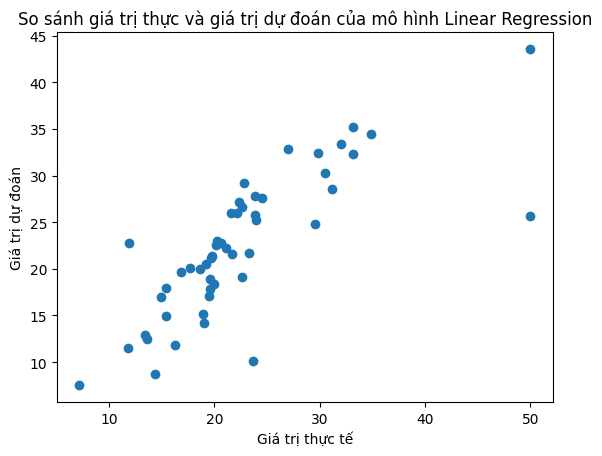

In [119]:
# Khởi tạo và đào tạo mô hình Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Dự đoán giá nhà trên tập kiểm tra
y_pred = linear_model.predict(X_test)

# Đánh giá hiệu suất sử dụng MSE và R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")

# Vẽ đồ thị so sánh giá trị thực và giá trị dự đoán
plt.scatter(y_test, y_pred)
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title('So sánh giá trị thực và giá trị dự đoán của mô hình Linear Regression')
plt.show()

In [120]:
#Cải thiện bằng cách chuẩn hóa dữ liệu
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Khởi tạo và đào tạo mô hình trên dữ liệu đã chuẩn hóa
linear_model_scaled = LinearRegression()
linear_model_scaled.fit(X_train_scaled, y_train)

# Dự đoán và đánh giá hiệu suất
y_pred_scaled = linear_model_scaled.predict(X_test_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print("\nHiệu suất sau khi chuẩn hóa dữ liệu:")
print(f"Mean Squared Error (MSE): {mse_scaled}")
print(f"R-squared (R^2): {r2_scaled}")

'''
Ở đây ta có thể thấy giá trị MSE đã giảm đi 1 ít chứng tỏ việc cải thiện này có hiệu quả.
'''


Hiệu suất sau khi chuẩn hóa dữ liệu:
Mean Squared Error (MSE): 26.6081357039086
R-squared (R^2): 0.5990814645206293


Đối với mô hình Random Forest Regression, ta có thể tăng độ chính xác bằng những cách sau:
* Tăng số lượng cây: Mô hình Random Forest Regression sẽ trở nên chính xác hơn khi số lượng cây quyết định tăng lên. Tuy nhiên, việc tăng số lượng cây quyết định cũng sẽ làm tăng thời gian huấn luyện và dự đoán của mô hình.
* Điều chỉnh độ sâu tối đa của cây: Độ sâu tối đa của cây quyết định cũng ảnh hưởng đến hiệu suất của mô hình. Nếu độ sâu quá nhỏ, mô hình có thể không học được đủ từ dữ liệu. Ngược lại, nếu độ sâu quá lớn, mô hình có thể bị quá khớp.

In [106]:
#Trước khi cải thiện (với số lượng cây là 100 và độ sâu là 5)
# Khởi tạo mô hình Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

# Đào tạo mô hình trên tập huấn luyện
rf_model.fit(X_train, y_train)

# Dự đoán giá nhà trên tập kiểm tra
y_pred = rf_model.predict(X_test)

# Đánh giá hiệu suất sử dụng MSE và R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")

<ipython-input-106-8b0f8aaff769>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Mean Squared Error (MSE): 10.691438298234523
R-squared (R^2): 0.8389065723207887


In [108]:
# Cải thiện mô hình (tăng số lượng cây thành 10000)
increase_tree_rf = RandomForestRegressor(n_estimators=10000, random_state=42)

In [109]:
# Huấn luyện mô hình với các thay đổi
increase_tree_rf.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred_improved = increase_tree_rf.predict(X_test)
mse_improved_tree = mean_squared_error(y_test, y_pred_improved)
r2_improved_tree = r2_score(y_test, y_pred_improved)

print("\nSau khi thực hiện cải thiện:")
print(f"Mean Squared Error (MSE): {mse_improved_tree}")
print(f"R-squared (R^2): {r2_improved_tree}")

'''
Ta có thể thấy giá trị MSE đã giảm và R-squared tăng lên,
điều này có nghĩa là mô hình đã được cải thiện bới vì
sai số (MSE) đã giảm xuống và phần trăm phù hợp với dữ liệu đã tăng lên.
Nhưng đồng thời, việc tăng số lượng cây cũng sẽ tăng thời gian thực thi!!
'''

<ipython-input-109-ac17976c1af7>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  increase_tree_rf.fit(X_train, y_train)



Sau khi thực hiện cải thiện:
Mean Squared Error (MSE): 8.478280801362363
R-squared (R^2): 0.8722533603973708


'\nTa có thể thấy giá trị MSE đã giảm và R-squared tăng lên,\nđiều này có nghĩa là mô hình đã được cải thiện bới vì \nsai số (MSE) đã giảm xuống và phần trăm phù hợp với dữ liệu đã tăng lên.\n'

In [110]:
# Cải thiện mô hình (tăng chiều sâu cây thành 200)
increase_deep_rf = RandomForestRegressor(n_estimators=100, max_depth = 200, random_state=42)

In [112]:
# Huấn luyện mô hình với các thay đổi
increase_deep_rf.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred_improved = increase_deep_rf.predict(X_test)
mse_improved_deep = mean_squared_error(y_test, y_pred_improved)
r2_improved_deep = r2_score(y_test, y_pred_improved)

print("\nSau khi thực hiện cải thiện:")
print(f"Mean Squared Error (MSE): {mse_improved_deep}")
print(f"R-squared (R^2): {r2_improved_deep}")
'''
Ta có thể thấy giá trị MSE đã giảm và R-squared tăng lên,
điều này có nghĩa là mô hình đã được cải thiện bới vì
sai số (MSE) đã giảm xuống và phần trăm phù hợp với dữ liệu đã tăng lên.
'''

<ipython-input-112-53e7da795328>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  increase_deep_rf.fit(X_train, y_train)



Sau khi thực hiện cải thiện:
Mean Squared Error (MSE): 8.72872587999998
R-squared (R^2): 0.8684797749322808


'\nTa có thể thấy giá trị MSE đã giảm và R-squared tăng lên,\nđiều này có nghĩa là mô hình đã được cải thiện bới vì \nsai số (MSE) đã giảm xuống và phần trăm phù hợp với dữ liệu đã tăng lên.\n'

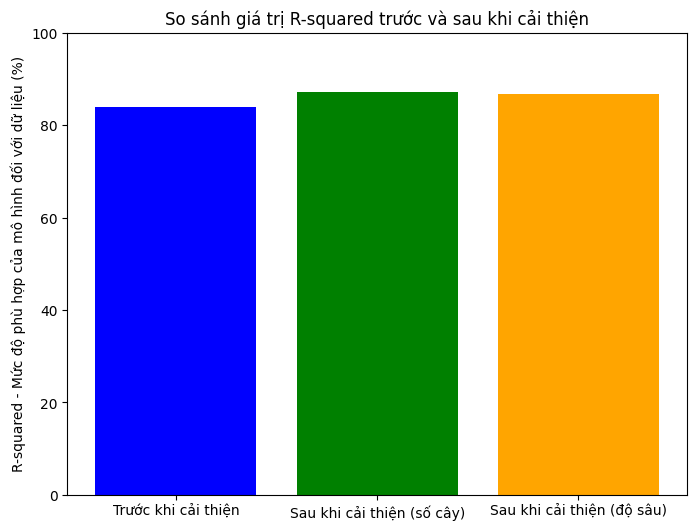

In [114]:
import matplotlib.pyplot as plt
import numpy as np

# Giá trị R-squared trước và sau khi cải thiện
r2_values_before = [r2, r2_improved_tree, r2_improved_deep]
labels = ['Trước khi cải thiện', 'Sau khi cải thiện (số cây)', 'Sau khi cải thiện (độ sâu)']

# Chuyển đổi giá trị R-squared thành phần trăm
r2_values_percentage = np.array(r2_values_before) * 100

# Vẽ đồ thị
plt.figure(figsize=(8, 6))
plt.bar(labels, r2_values_percentage, color=['blue', 'green', 'orange'])
plt.ylim(0, 100)  # Đặt giới hạn trục y từ 0 đến 100
plt.ylabel('R-squared - Mức độ phù hợp của mô hình đối với dữ liệu (%)')
plt.title('So sánh giá trị R-squared trước và sau khi cải thiện')
plt.show()

Đối với mô hình học máy Gradient Boosting Regression, ta có thể cải thiện bằng cách:

In [122]:
#Trước khi cải thiện
# Khởi tạo mô hình Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Đào tạo mô hình trên tập huấn luyện
gb_model.fit(X_train, y_train)

# Dự đoán giá nhà trên tập kiểm tra
y_pred_gb = gb_model.predict(X_test)

# Đánh giá hiệu suất sử dụng MSE và R-squared
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting:")
print(f"Mean Squared Error (MSE): {mse_gb}")
print(f"R-squared (R^2): {r2_gb}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting:
Mean Squared Error (MSE): 6.786611339859706
R-squared (R^2): 0.8977426186666448


In [124]:
#Cải thiện bằng tinh chỉnh tham số đầu vào
from sklearn.model_selection import GridSearchCV

# Khởi tạo mô hình
gb_model_improve = GradientBoostingRegressor(random_state=42)

# Thiết lập các giá trị tham số để tinh chỉnh
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Sử dụng GridSearchCV để tìm giá trị tối ưu
grid_search = GridSearchCV(estimator=gb_model_improve, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Lấy giá trị tham số tối ưu
best_params = grid_search.best_params_

# In giá trị tham số tối ưu
print("Tham số tối ưu:", best_params)
#Sau khi chạy ta sẽ được tham số tối ưu như sau:
#Tham số tối ưu: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Tham số tối ưu: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [125]:
# Đào tạo mô hình với tham số tối ưu
optimized_gb_model = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=42)
optimized_gb_model.fit(X_train, y_train)

# Đánh giá hiệu suất
y_pred_optimized = optimized_gb_model.predict(X_test)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print("\nHiệu suất sau khi tinh chỉnh tham số:")
print(f"Mean Squared Error (MSE): {mse_optimized}")
print(f"R-squared (R^2): {r2_optimized}")

'''
Ta có thể thấy giá trị MSE đã giảm đi 1 ít.
Điều đó chứng tỏ việc thay đổi các giá trị mặc định bằng các giá trị tối ưu sau khi tìm ra sẽ cải thiện độ chính xác cho mô hình Gradient Boosting Regressor
'''


Hiệu suất sau khi tinh chỉnh tham số:
Mean Squared Error (MSE): 6.6023862059038505
R-squared (R^2): 0.9005184339934295


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


'\nTa có thể thấy giá trị MSE đã giảm đi 1 ít.\nĐiều đó chứng tỏ việc thay đổi các giá trị mặc định bằng các giá trị tối ưu sau khi tìm ra sẽ cải thiện độ chính xác cho mô hình Gradient Boosting Regressor\n'